Pandas Data Frames

In [ ]:
# Creating a data frame

import pandas
dataFrame = (pandas.DataFrame(data =
            { 'A': [15, 14, 13],
              'B': [12, 11, 10],
              'C': [9, 8, 7],
              'D': [6, 5, 4],
              'E': [3, 2, 1] }))
dataFrame

,A,B,C,D,E
0,15,12,9,6,3
1,14,11,8,5,2
2,13,10,7,4,1


In [ ]:
# Making a copy of a data frame, changing the index, and renaming columns

dataFrame2 = dataFrame.copy()
dataFrame2.index = ['$', '@', '*']
renames = {'A': 'a', 'B': 'b', 'C': 'c', 'D': 'd', 'E': 'e'}
dataFrame2.rename(columns = renames, inplace = True)

dataFrame2

,a,b,c,d,e
$,15,12,9,6,3
@,14,11,8,5,2
*,13,10,7,4,1


In [ ]:
# Dropping a row, replacing a value, and adding a column

dataFrame2.drop(['$'], inplace = True)
dataFrame2['a'] = dataFrame2['a'].replace(13, 0)
dataFrame2['f'] = [20, 20]

print(dataFrame2)

    a   b  c  d  e   f
@  14  11  8  5  2  20
*   0  10  7  4  1  20


In [ ]:

dataFrame3 = (pandas.DataFrame(data =
            { 'A': [32, 31, 30, 30],
              'B': [29, 28, 28, 27],
              'C': [26, 25, 24, 23],
              'D': [23, 23, 22, 21],
              'E': [20, 32, 19, 18],
              'F': [17, 17, 16, 15],
              'G': [14, 14, 14, 14],
              'H': [13, 28, 12, 11],
              'I': [32, 10, 9, 9],
              'J': [8, 8, 7, 6],
              'K': [5, 4, 6, 3],
              'L': [2, 2, 1, 0],
              'M': ['happy', 'sad','hungry', 'sleepy']}))
dataFrame3

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,32,29,26,23,20,17,14,13,32,8,5,2,happy
1,31,28,25,23,32,17,14,28,10,8,4,2,sad
2,30,28,24,22,19,16,14,12,9,7,6,1,hungry
3,30,27,23,21,18,15,14,11,9,6,3,0,sleepy


In [ ]:
# Get value counts and data type

dataFrame3['A'].value_counts()

30    2
32    1
31    1
Name: A, dtype: int64

In [ ]:
# Cat Codes

dataFrame3['M'] = dataFrame3['M'].astype('category')
dataFrame3['M'] = dataFrame3['M'].cat.codes
dataFrame3

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,32,29,26,23,20,17,14,13,32,8,5,2,0
1,31,28,25,23,32,17,14,28,10,8,4,2,2
2,30,28,24,22,19,16,14,12,9,7,6,1,1
3,30,27,23,21,18,15,14,11,9,6,3,0,3


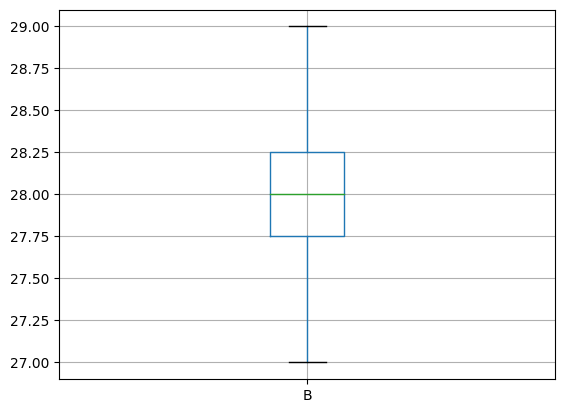

In [ ]:
# Boxplot

%matplotlib inline
boxplot = dataFrame3.boxplot('B')

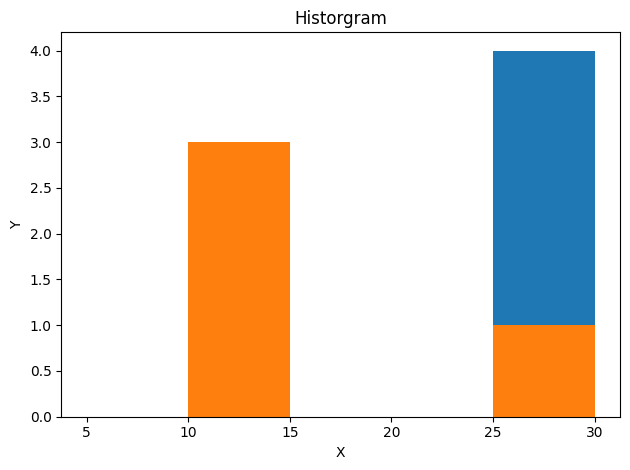

In [ ]:
# Histogram

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


ax.hist(dataFrame3['B'], bins=[5, 10, 15, 20 , 25, 30])
ax.hist(dataFrame3['H'], bins=[5, 10, 15, 20 , 25, 30])
ax.set_title('Historgram')
ax.set_xlabel('X')
ax.set_ylabel('Y')

fig.tight_layout()
plt.show()

Web Scraping

In [ ]:
from bs4 import BeautifulSoup
import requests

URL = "https://www.pro-football-reference.com/teams/gnb/2022.htm"
webPage = requests.get(URL)

result = BeautifulSoup(webPage.content, 'html.parser')
result


<!DOCTYPE html>

<html class="no-js" data-root="/home/pfr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202305232" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME = '__tcfapiL

In [ ]:
# Finding elements by class ID

roster = result.find(name = 'table', attrs = {'id' : 'roster'})

roster

Merging Two DataFrames into one DataFrame

In [ ]:
import pandas as pd

dataFrame = pd.read_csv('Heart_Disease_Prediction.csv')
dataFrame

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
dataFrame2 = dataFrame[['Heart Disease', 'Age',]]
dataFrame3 = dataFrame[['Heart Disease', 'Cholesterol',]]

In [ ]:
combined_dataframes = pd.merge(left=dataFrame2, right=dataFrame3, on=['Heart Disease'], how='inner')
combined_dataframes

,Age,Heart Disease,Cholesterol
0,70,Presence,322
1,70,Presence,261
2,70,Presence,256
3,70,Presence,239
4,70,Presence,293
...,...,...,...
36895,57,Absence,266
36896,57,Absence,199
36897,57,Absence,263
36898,57,Absence,294
